# 1. Import Package 

In [16]:
import urllib.parse
import urllib.request
import os
import pandas as pd
import numpy as np

# 2. Accessing USG Daily Streamflow Data

2.1.   Enter Required Info 

In [17]:
station_number = input("What is the USGS Station ID?\t")
start_date = input("Start Date (YYYY-MM-DD):\t")
end_date = input("End Date (YYYY-MM-DD):\t")
folder = os.getcwd()

2.2 Create inique URL 

In [18]:
section1 = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
section2 = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd='\
'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key='\
'NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date='
section3 = '&end_date='
section4 = '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

link = (section1 + station_number + section2 + start_date + section3 + end_date + section4)
print("Click here to see the generated USGS link: \n",link)

Click here to see the generated USGS link: 
 https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=05289800&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date=2015-5-01&end_date=2022-05-12&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection


 2.3 Download and Process Daily Streamflow Data 

In [19]:
USGS_page = urllib.request.urlopen(link)
downloaded_data = USGS_page.read()

In [20]:
type(downloaded_data)

bytes

In [21]:
str_data = downloaded_data.decode()
type(str_data)
str_data

"# ---------------------------------- WARNING ----------------------------------------\n# Some of the data that you have obtained from this U.S. Geological Survey database \n# may not have received Director's approval. Any such data values are qualified\n# as provisional and are subject to revision. Provisional data are released on the\n# condition that neither the USGS nor the United States Government may be held liable\n# for any damages resulting from its use.\n#\n# Additional info: https://waterdata.usgs.gov/provisional-data-statement/\n#\n# Contact:   gs-w_waterdata_support@usgs.gov\n# retrieved: 2025-03-14 22:26:12 EDT       (nadww01)\n#\n# Data for the following 1 site(s) are contained in this file\n#    USGS 05289800 MINNEHAHA CREEK AT HIAWATHA AVE. IN MINNEAPOLIS,MN\n# -----------------------------------------------------------------------------------\n#\n# Data provided for site 05289800\n#            TS   parameter     statistic     Description\n#         73261       00060  

In [22]:
f_str_data = str_data.split('\n')
#f_str_data

In [23]:
station_name = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("#    USGS"):
        station_name=f_str_data[line][3:]
print(station_name)

  USGS 05289800 MINNEHAHA CREEK AT HIAWATHA AVE. IN MINNEAPOLIS,MN


In [24]:
date_flow = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("USGS"):
        data = f_str_data[line][14:]
        columns = data.split('\t')
        rows = ','.join([columns[0],(columns[1])])
        date_flow += rows + '\n'
date_flow = date_flow.encode()

with open(folder+'/USGS_Data_for_' + station_number  + '.txt', 'wb') as text:
        text.write(date_flow)

In [25]:
filename = folder+'/USGS_Data_for_' + station_number  + '.txt'
columns = ['Date','Discharge (cfs)']
df = pd.read_csv(filename,header=None,names=columns,parse_dates=[0])
df=df.set_index(['Date'])
df['Discharge (cfs)']=pd.to_numeric(df['Discharge (cfs)'], errors='coerce')
df.tail()

,Discharge (cfs)
Date,
2022-05-08,27.8
2022-05-09,25.2
2022-05-10,24.0
2022-05-11,53.1
2022-05-12,138.0


2.4 Create Hydrograph 

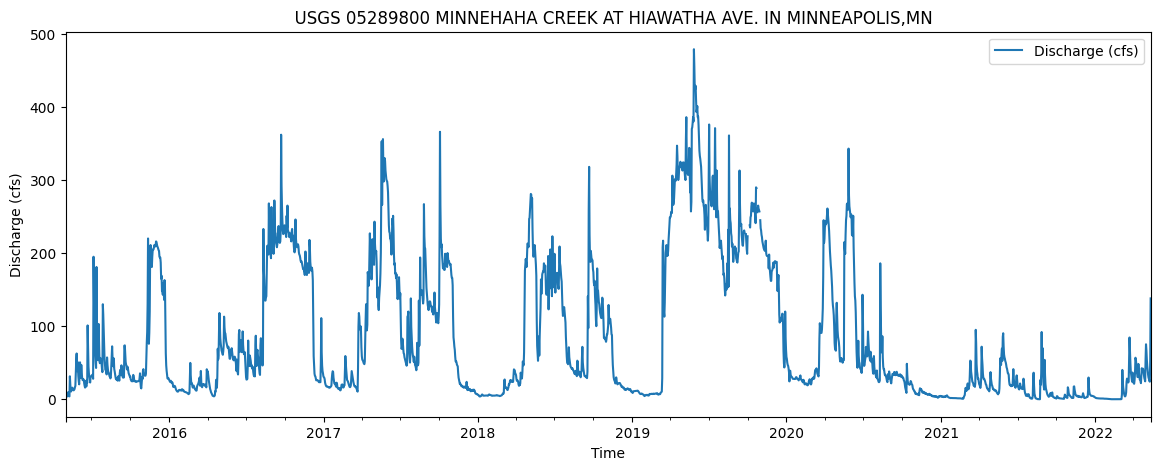

In [26]:
df.plot(figsize=(14,5), title= station_name, xlabel="Time", ylabel="Discharge (cfs)");